# JamCoders Week 3 Day 1 Lecture 2

### Recursion

<img src="coriander-fractal.jpg" alt="Fractal coriander plant" width="400"/>
<center>Recursive drawing of coriander plant</center>
<center>(credit: https://matthewjamestaylor.com/recursive-drawing)</center>

<img src="tree.png" alt="Fractal tree" width="400"/>
<center>Recursive drawing of a fractal tree</center>
<center>(credit: generated from code <a href="https://stackoverflow.com/questions/39853005/drawing-a-fractal-tree-in-python-not-sure-how-to-proceed">here</a>, @cdlane answer)</center>

In [1]:
import math

def length(P):
    return math.sqrt(P[0]*P[0] + P[1]*P[1])

# is C to the left of the directed line segment A->B?
def is_left(A, B, C):
    return (B[0] - A[0])*(C[1] - A[1]) > (B[1] - A[1])*(C[0] - A[0])

def calc_R(P, Q):
    mid = [ (P[0]+Q[0])/2., (P[1] + Q[1])/2. ]
    orthog = [0, 1]
    direction = [Q[0] - P[0], Q[1] - P[1]]
    if direction[1] != 0:
        orthog = [ 1, -direction[0]/direction[1] ] 
    l = length(orthog)
    orthog = [ orthog[0]/l, orthog[1]/l ]
    d = length(direction)/2
    R = [mid[0] + orthog[0]*d, mid[1] + orthog[1]*d]
    if is_left(P, Q, R):
        R = [mid[0] - orthog[0]*d, mid[1] - orthog[1]*d]
    return R

In [2]:
print(calc_R([0, 0], [1, 0]))

[0.5, -0.5]


In [3]:
def dragon(n, P, Q):
    if n == 0:
        return [[P, Q]]
    else:
        R = calc_R(P, Q)
        return dragon(n-1, P, R) + dragon(n-1, Q, R)

In [4]:
print(dragon(3, [0, 0], [1, 0]))

[[[0, 0], [-0.25, -0.25]], [[0.0, -0.5], [-0.25, -0.25]], [[0.5, -0.5], [0.25, -0.25]], [[0.0, -0.5], [0.25, -0.25]], [[1, 0], [0.75, 0.25]], [[0.5, 0.0], [0.75, 0.25]], [[0.5, -0.5], [0.75, -0.25]], [[0.5, 0.0], [0.75, -0.25]]]


In [5]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Polygon
from matplotlib.collections import PatchCollection, LineCollection

    
def draw(L):
    plt.style.use('ggplot')
    f, ax = plt.subplots()
    lc = LineCollection(L)
    ax.add_collection(lc)
    ax.autoscale(tight=True)
    ax.set_aspect('equal')
    plt.axis('off')    
    plt.show()

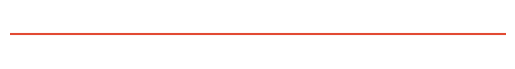

In [8]:
draw(dragon(0,[0, 0],[1,0]))

# Recursion Basics

In recursion, a function calls itself. Recursion is used when a problem can be easily divided into smaller problems of the same form.

A recursive function has 2 components:

**Base case:** Simplest possible input and prevents infinite recursion.

**Recursive step:** Call the same function itself with a smaller/easier input to the function and act on the output of the smaller function call.
Key steps to making a function recursive: figure out the base case and the recursive step for your problem.

The steps of writing a recursive function:

1. Given a large instance of a problem, how can you break the problem down into smaller pieces? (ignore the base-case)
1. What instances of the problem do you know the answer to? (base case)
1. Put them together

In [ ]:
# Sum all elements in a list
def sum_all(L):
    ans = 0
    for x in L:
        ans += x
    return x

In [ ]:
# Sum all elements in a list, using recursion
def sum_all_recursive(L):
    if len(L) == 0:
        return 0
    else:
        return L[0] + sum_all_recursive(L[1:])

In [ ]:
# Find minimum element in a list
def find_min(L):
    ans = L[0]
    for x in L[1:]:
        ans = min(x, ans)
    return ans

In [ ]:
# Find minimum element in a list, using recursion
def find_min_recursive(L):
    if len(L) == 1:
        return L[0]
    else:
        return min(L[0], find_min_recursive(L[1:]))

In [ ]:
# multiplication via repeated addition
def mult(x, y):
    ans = 0
    for i in range(y):
        ans += x
    return ans

In [ ]:
# now implement it recursively
def mult_recursive(x, y):
    if y == 0:
        return 0
    else:
        return x + mult_recursive(x, y-1)

In [ ]:
# return a to the bth power, i.e. a**b
def power(a, b):
    ans = 1
    for i in range(b):
        ans *= a
    return ans

In [ ]:
# do powering using recursion
def power_recursive(a, b):
    if b == 0:
        return 1
    else:
        return a * power_recursive(a, b-1)

In [ ]:
# sneak peak of the power of algorithms: making procedures more efficient
# power_recursive ultimately does multiplication (the '*') operation b-1 times
# but fast_power_recursive only needs to do '*' at most 2*log_2(b) times
def fast_power_recursive(a, b):
    if b == 0:
        return 1
    else:
        x = fast_power_recursive(a, b//2)
        x *= x
        if b % 2 == 1:
            x *= a
        return x

In [ ]:
# code below taken from https://stackoverflow.com/questions/39853005/drawing-a-fractal-tree-in-python-not-sure-how-to-proceed
# @cdlane answer

import turtle

WIDTH = 15
BRANCH_LENGTH = 120
ROTATION_LENGTH = 27


class Tree_Fractal(turtle.Turtle):
    def __init__(self, level):
        super(Tree_Fractal, self).__init__()
        self.level = level
        self.hideturtle()
        self.speed('fastest')
        self.left(90)
        self.width(WIDTH)
        self.penup()
        self.back(BRANCH_LENGTH * 1.5)
        self.pendown()
        self.forward(BRANCH_LENGTH)
        self.draw_tree(BRANCH_LENGTH, level)

    def draw_tree(self, branch_length, level):
        width = self.width()
        self.width(width * 3. / 4.)
        branch_length *= 3. / 4.
        self.left(ROTATION_LENGTH)
        self.forward(branch_length)

        if level > 0:
            self.draw_tree(branch_length, level - 1) # RECURSION!
        self.back(branch_length)
        self.right(2 * ROTATION_LENGTH)
        self.forward(branch_length)

        if level > 0:
            self.draw_tree(branch_length, level - 1) # RECURSION!
        self.back(branch_length)
        self.left(ROTATION_LENGTH)

        self.width(width)

In [ ]:
tree = Tree_Fractal(8)